# Параметры

In [1]:
import os
import numpy as np
exp_name="6"
try:
    os.mkdir((f"exp_{exp_name}"))
except:
    pass

In [2]:
#параметры области:
x_0=-70
x_1=230
t_0=0
t_1=100
#функция, задающая начальные условия и параметры этой функции:
k_param=1
w_param=0.88
x0_param=-30
th0_param=0
alpha0_param=0.35

alpha=0.3
beta=0

def q(x,t):
    mu=4*(k_param**2-w_param)
    k_exp = np.exp(np.sqrt(mu)*(x - 2*k_param*t - x0_param))
    f_com = ((mu*k_exp) / ((0.5*k_exp+1)**2 - k_exp*k_exp*alpha0_param*mu/3))**0.5
    u = f_com*np.cos(k_param*x - w_param*t + th0_param)
    v = f_com*np.sin(k_param*x - w_param*t + th0_param)
    u=np.nan_to_num(u) #нужно на больших областях, когда на краях области появляются Nan
    v=np.nan_to_num(v)
    return u,v

# Ввод сырых данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
q_min=5e-3
t_sectors=5
raw_data = pd.read_csv('./raw_data_3.csv')#из файла
raw_t_0=0
raw_t_1=100
raw_x_0=-70
raw_x_1=230
raw_t_parts=1000
raw_x_parts=3000
raw_X = np.array(raw_data['x']).reshape(raw_t_parts,raw_x_parts)
raw_T = np.array(raw_data['t']).reshape(raw_t_parts,raw_x_parts)
raw_U = np.array(raw_data['pred_u']).reshape(raw_t_parts,raw_x_parts)
raw_V = np.array(raw_data['pred_v']).reshape(raw_t_parts,raw_x_parts)
raw_Q_abs = np.array(raw_data['pred_h']).reshape(raw_t_parts,raw_x_parts)

[]

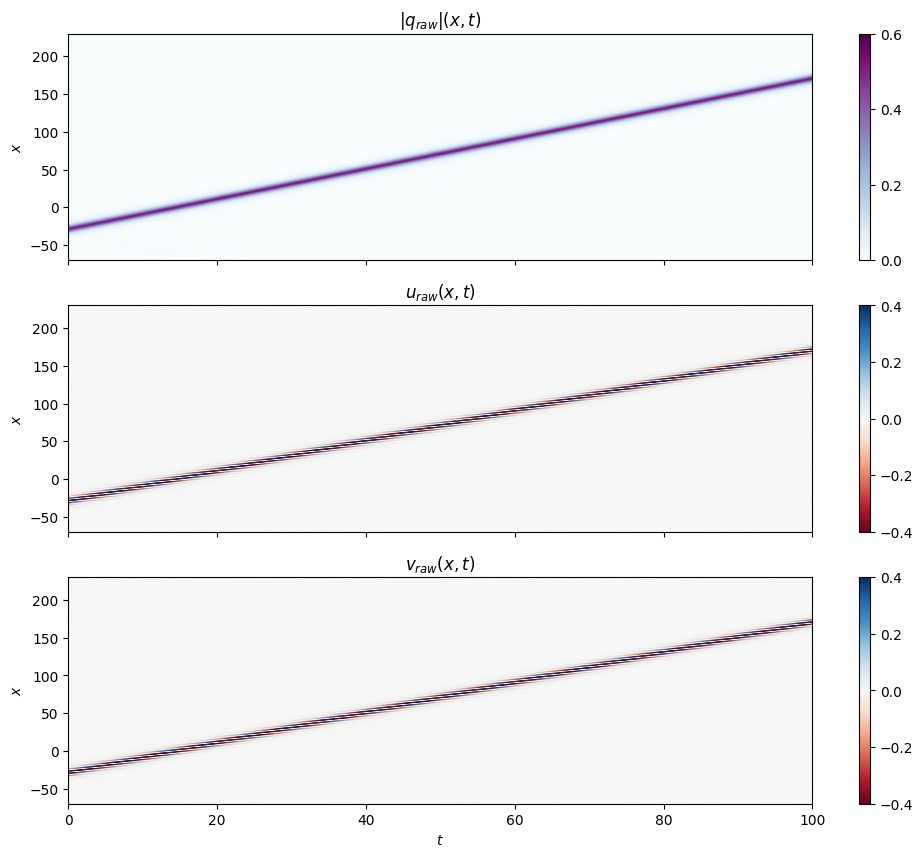

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(12,10), dpi=100)

for ax in axs.flat:
    ax.set(xlabel='$t$', ylabel='$x$')

for ax in axs.flat:
    ax.label_outer()

c = axs[0].pcolormesh(raw_T, raw_X, raw_Q_abs, cmap='BuPu', vmin=0, vmax=0.6)
axs[0].set_title('$|q_{raw}|(x,t)$')
axs[0].axis([raw_t_0, raw_t_1, raw_x_0, raw_x_1])
fig.colorbar(c, ax=axs[0], ticks=np.linspace(0,0.6,4))

c = axs[1].pcolormesh(raw_T, raw_X, raw_U, cmap='RdBu', vmin=-0.4, vmax=0.4)
axs[1].set_title('$u_{raw}(x,t)$')
axs[1].axis([raw_t_0, raw_t_1, raw_x_0, raw_x_1])
fig.colorbar(c, ax=axs[1], ticks=np.linspace(-0.4,0.4,5))

c = axs[2].pcolormesh(raw_T, raw_X, raw_V, cmap='RdBu', vmin=-0.4, vmax=0.4)
axs[2].set_title('$v_{raw}(x,t)$')
axs[2].axis([raw_t_0, raw_t_1, raw_x_0, raw_x_1])
fig.colorbar(c, ax=axs[2], ticks=np.linspace(-0.4,0.4,5))

plt.plot()

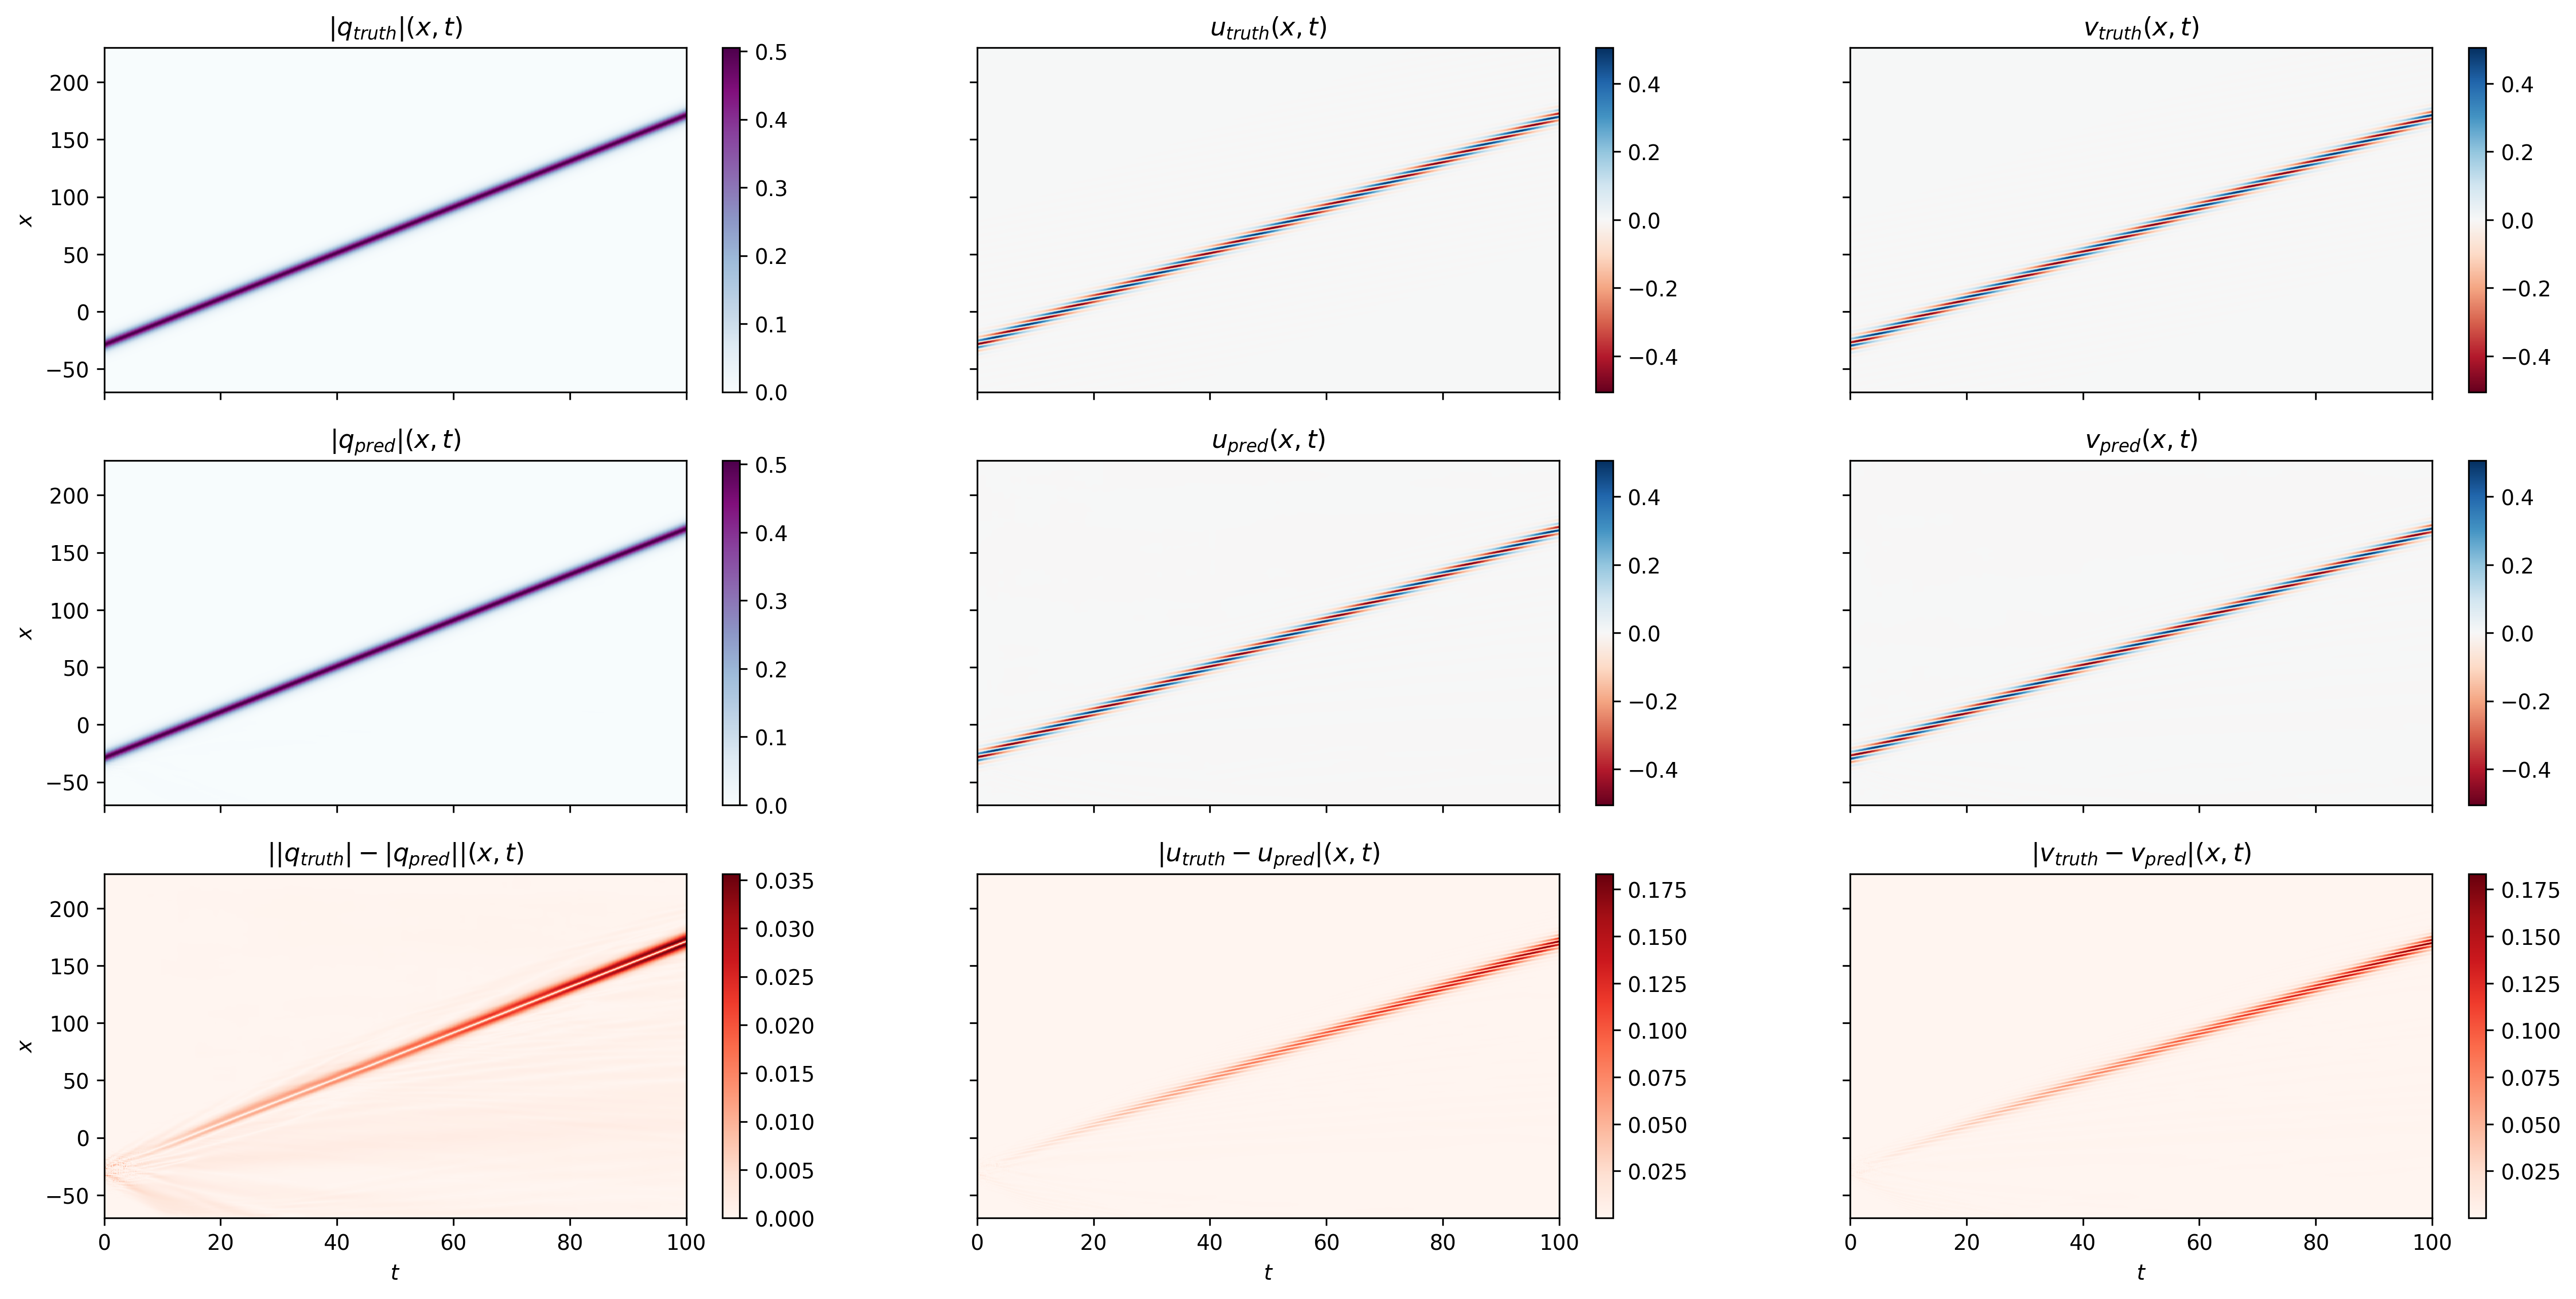

In [5]:
Q_truth=q(raw_X,raw_T)[0]+1j*q(raw_X,raw_T)[1]
U_truth=np.real(Q_truth)
V_truth=np.imag(Q_truth)
Q_abs_truth=np.abs(Q_truth)

fig, axs = plt.subplots(3, 3, figsize=(21,10), dpi=300)

for ax in axs.flat:
    ax.set(xlabel='$t$', ylabel='$x$')

for ax in axs.flat:
    ax.label_outer()

q_abs_min, q_abs_max = 0, np.abs(Q_abs_truth).max()
c = axs[0,0].pcolormesh(raw_T, raw_X, Q_abs_truth, cmap='BuPu', vmin=q_abs_min, vmax=q_abs_max)
axs[0,0].set_title('$|q_{truth}|(x,t)$')
axs[0,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,0])

u_min, u_max = -np.abs(U_truth).max(), np.abs(U_truth).max()
c = axs[0,1].pcolormesh(raw_T, raw_X, U_truth, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[0,1].set_title('$u_{truth}(x,t)$')
axs[0,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,1])

c = axs[0,2].pcolormesh(raw_T, raw_X, V_truth, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[0,2].set_title('$v_{truth}(x,t)$')
axs[0,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,2])


#q_abs_min, q_abs_max = 0, np.abs(Q_abs_calc).max()
c = axs[1,0].pcolormesh(raw_T, raw_X, raw_Q_abs, cmap='BuPu', vmin=q_abs_min, vmax=q_abs_max)
axs[1,0].set_title('$|q_{pred}|(x,t)$')
axs[1,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,0])

#u_min, u_max = -np.abs(U_calc).max(), np.abs(U_calc).max()
c = axs[1,1].pcolormesh(raw_T, raw_X, raw_U, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[1,1].set_title('$u_{pred}(x,t)$')
axs[1,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,1])

c = axs[1,2].pcolormesh(raw_T, raw_X, raw_V, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[1,2].set_title('$v_{pred}(x,t)$')
axs[1,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,2])


U_diff = np.abs(U_truth-raw_U)
V_diff = np.abs(V_truth-raw_V)
Q_abs_diff = np.abs(Q_abs_truth-raw_Q_abs)

q_abs_min, q_abs_max = 0, np.abs(Q_abs_diff).max()
c = axs[2,0].pcolormesh(raw_T, raw_X, Q_abs_diff, cmap='Reds', vmin=q_abs_min, vmax=q_abs_max)
axs[2,0].set_title('$||q_{truth}|-|q_{pred}||(x,t)$')
axs[2,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,0])

u_min, u_max = U_diff.min(), U_diff.max()
c = axs[2,1].pcolormesh(raw_T, raw_X, U_diff, cmap='Reds', vmin=u_min, vmax=u_max)
axs[2,1].set_title('$|u_{truth}-u_{pred}|(x,t)$')
axs[2,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,1])

c = axs[2,2].pcolormesh(raw_T, raw_X, V_diff, cmap='Reds', vmin=u_min, vmax=u_max)
axs[2,2].set_title('$|v_{truth}-v_{pred}|(x,t)$')
axs[2,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,2])

plt.savefig(f"exp_{exp_name}/raw.png")
plt.show()

In [6]:
mse_q = np.mean((Q_abs_truth.flatten() - raw_Q_abs.flatten())**2) #средний квадрат разности модулей
rel_h = np.linalg.norm(Q_abs_truth.flatten() - raw_Q_abs.flatten(), 2)/np.linalg.norm(Q_abs_truth.flatten(), 2)
print(f'MSE_q: {mse_q:.3e}, Rel_h: {rel_h:.3e}')

MSE_q: 1.085e-05, Rel_h: 4.650e-02


In [7]:
processed_X = raw_X[np.where(raw_Q_abs>q_min)]
processed_T = raw_T[np.where(raw_Q_abs>q_min)]
processed_U = raw_U[np.where(raw_Q_abs>q_min)]
processed_V = raw_V[np.where(raw_Q_abs>q_min)]
processed_Q_abs = raw_Q_abs[np.where(raw_Q_abs>q_min)]

t_bounds=np.linspace(raw_t_0,raw_t_1,t_sectors+1)
separated_X=[]
separated_T=[]
separated_U=[]
separated_V=[]
separated_Q_abs=[]
for i in range(1,t_sectors+1):
  mask_for_t=(processed_T>=t_bounds[i-1]) & (processed_T<=t_bounds[i])
  separated_X.append(np.expand_dims(processed_X[np.where(mask_for_t)],axis=1))
  separated_T.append(np.expand_dims(processed_T[np.where(mask_for_t)],axis=1))
  separated_U.append(np.expand_dims(processed_U[np.where(mask_for_t)],axis=1))
  separated_V.append(np.expand_dims(processed_V[np.where(mask_for_t)],axis=1))
  separated_Q_abs.append(np.expand_dims(processed_Q_abs[np.where(mask_for_t)],axis=1))

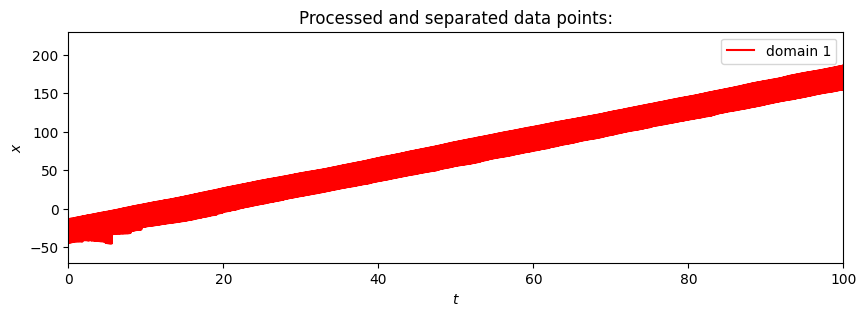

In [8]:
colors=['red','green','blue','orange','purple','grey','yellow','brown','limegreen','skyblue','olive']
plt.figure(figsize=(10,3))
plt.title("Processed and separated data points:")
plt.axis([raw_t_0, raw_t_1, raw_x_0, raw_x_1])
for i in range(0,t_sectors):
  plt.plot(separated_T[i], separated_X[i], color=colors[i], label=f'domain {i+1}')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.axis([raw_t_0, raw_t_1, raw_x_0, raw_x_1])
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig(f"exp_{exp_name}/decomposition.png", bbox_inches='tight')
plt.show()

#PINN

In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from collections import OrderedDict #упорядоченный словарь
import time
np.random.seed(1234)

if torch.cuda.is_available(): #можно сменить среду выполнения на gpu и обучение будет происходить быстрее
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [10]:
class SinActivation(torch.nn.Module): #кастомная функция активации - sin
    def __init__(self):
        super(SinActivation, self).__init__()
        return
    def forward(self, x):
        return torch.sin(x)

class DNN(torch.nn.Module): # нейросеть, в виде которой будет находиться решение
    def __init__(self, layers): #принимает на вход массив целых чисел
        super(DNN, self).__init__() #вызывает метод init(почему нельзя сделать это без super?)

        self.depth = len(layers) - 1
        self.activation = SinActivation #в качестве функции активации используется sin

        layer_list = list() #список с весами и функциями активации для каждого слоя
        for i in range(self.depth - 1):
            layer_list.append(
                ('layer_%d' % i, torch.nn.Linear(layers[i], layers[i+1])) #каждые два слоя образуют двудольный граф
            )
            layer_list.append(('activation_%d' % i, self.activation()))

        layer_list.append(
            ('layer_%d' % (self.depth - 1), torch.nn.Linear(layers[-2], layers[-1])) #нельзя сделать в цикле, потому что нет функции активации
        )

        layerDict = OrderedDict(layer_list) #сделали упорядоченный словарь, чтобы при использовании элементы выдавались в том порядке, в котором были добавлены

        # deploy layers
        self.layers = torch.nn.Sequential(layerDict) #задали архитектуру нейросети
    def forward(self, x):
        out = self.layers(x)
        return out

class PhysicsInformedNN(): # PINN
    def __init__(self, X_tl, u_tl, v_tl, X_uv, u, v, X_b, layers, alpha, beta):

        # данные для обучения
        self.x_tl = torch.tensor(X_tl[:, 0:1], requires_grad=True).float().to(device) #для transfer learning: (x_tl, t_tl, u, v)
        self.t_tl = torch.tensor(X_tl[:, 1:2], requires_grad=True).float().to(device)
        self.u_tl = torch.tensor(u_tl).float().to(device)
        self.v_tl = torch.tensor(v_tl).float().to(device)
        self.x_uv = torch.tensor(X_uv[:, 0:1], requires_grad=True).float().to(device) #для начальных условий: (x_uv, t_uv, u, v)
        self.t_uv = torch.tensor(X_uv[:, 1:2], requires_grad=True).float().to(device)
        self.u = torch.tensor(u).float().to(device)
        self.v = torch.tensor(v).float().to(device)
        self.x_b = torch.tensor(X_b[:, 0:1], requires_grad=True).float().to(device) #для граничных условий: (x_b, t_b, 0, 0)
        self.t_b = torch.tensor(X_b[:, 1:2], requires_grad=True).float().to(device)
        self.x_f = torch.tensor(X_tl[:, 0:1], requires_grad=True).float().to(device) #для уравнения: (x_f, t_f, f=0) (используются переданные сети точки)
        self.t_f = torch.tensor(X_tl[:, 1:2], requires_grad=True).float().to(device)
        #self.x_f = torch.tensor((lb + (ub-lb)*lhs(2, N_f))[:, 0:1], requires_grad=True).float().to(device) #создаём N_f точек для обучения соответствия уравнению. те, что переданы, не используем
        #self.t_f = torch.tensor((lb + (ub-lb)*lhs(2, N_f))[:, 1:2], requires_grad=True).float().to(device)

        # числовые коэффициенты в уравнении
        self.alpha = alpha
        self.beta = beta

        # модель
        self.layers = layers
        self.dnn = DNN(layers).to(device)

        # оптимизатор - LBFGS, обучает с точностью до 1e-5 или пока разница в точности уменьшается больше, чем точность float(?)
        self.optimizer = torch.optim.LBFGS(
            self.dnn.parameters(),
            lr=1e-7,
            max_iter=50000,
            max_eval=50000,
            history_size=50,
            tolerance_grad=5e-8,
            tolerance_change=1.0 * np.finfo(float).eps,
            #line_search_fn="strong_wolfe"
        )

        self.adam = torch.optim.Adam(
          self.dnn.parameters(),
          lr=0.005,
          betas=(0.9, 0.999),
          eps=1e-08,
          weight_decay=0,
          amsgrad=False)

        self.iter = 0

    def net_uv(self, x, t): # вывод модели
        u = self.dnn(torch.cat([x, t], dim=1))[:,0:1]
        v = self.dnn(torch.cat([x, t], dim=1))[:,1:2]
        return u, v

    def net_f(self, x, t): #вывод  функции
        """ The pytorch autograd version of calculating residual """
        u, v = self.net_uv(x, t)

        u_t = torch.autograd.grad(
            u, t,
            grad_outputs=torch.ones_like(u),
            retain_graph=True,
            create_graph=True
        )[0] #производая по t
        u_x = torch.autograd.grad(
            u, x,
            grad_outputs=torch.ones_like(u),
            retain_graph=True,
            create_graph=True
        )[0] #производная по x
        u_xx = torch.autograd.grad(
            u_x, x,
            grad_outputs=torch.ones_like(u_x),
            retain_graph=True,
            create_graph=True
        )[0] #вторая призводная по x

        v_t = torch.autograd.grad(
            v, t,
            grad_outputs=torch.ones_like(v),
            retain_graph=True,
            create_graph=True
        )[0] #производая по t
        v_x = torch.autograd.grad(
            v, x,
            grad_outputs=torch.ones_like(v),
            retain_graph=True,
            create_graph=True
        )[0] #производная по x
        v_xx = torch.autograd.grad(
            v_x, x,
            grad_outputs=torch.ones_like(v_x),
            retain_graph=True,
            create_graph=True
        )[0] #вторая призводная по x

        f_u = u*(u**2 + v**2)*(-self.alpha*(u**2 + v**2) + self.beta*(u**2 + v**2)**2 + 1) + u_xx - v_t #это и есть действительная и коплексная части исходного уравнения
        f_v = u_t + v*(u**2 + v**2)*(-self.alpha*(u**2 + v**2) + self.beta*(u**2 + v**2)**2 + 1) + v_xx #они получены путём подстановки q=u+i*v в него
        return f_u, f_v

    def loss_func(self): #функция потерь
        self.optimizer.zero_grad() #обнуляет градиенты
        transfer_period = 20000
        if self.iter <= transfer_period: # учим удовлетворять значениям
          u_pred, v_pred = self.net_uv(self.x_tl, self.t_tl)
          loss_tl = torch.mean(((self.u_tl - u_pred) ** 2 + (self.v_tl - v_pred) ** 2)/2) #средний квадрат всех отклонений от известных значений
          loss = loss_tl
        if self.iter > transfer_period: # учим удовлетворять уравнению
          u_pred, v_pred = self.net_uv(self.x_uv, self.t_uv)
          u_pred_b, v_pred_b = self.net_uv(self.x_b, self.t_b)
          f_u_pred, f_v_pred = self.net_f(self.x_f, self.t_f)
          loss_uv = torch.mean(((self.u - u_pred) ** 2 + (self.v - v_pred) ** 2)/2) #средний квадрат всех отклонений от начальных условий
          loss_b = torch.mean(((u_pred_b) ** 2 + (v_pred_b) ** 2)/2) #средний квадрат всех отклонений от нулевых граничных условий  
          loss_f = torch.mean((f_u_pred ** 2 + f_v_pred ** 2)/2) #средний квадрат всех отклонений от условия
          loss = loss_uv + loss_b + loss_f

        loss.backward()
        self.iter += 1
        if self.iter % 1000 == 0:
            if self.iter <= transfer_period:
              print('Iter %d, Loss: %.5e' % (self.iter, loss.item()))
            else:
              print('Iter %d, Loss: %.5e, Loss_uv: %.5e, Loss_b: %.5e, Loss_f: %.5e' % (self.iter, loss.item(), loss_uv.item(), loss_b.item(), loss_f.item()))
            loss_array.append(loss.item()) #loss запоминаем для графика
            iter_array.append(self.iter)

        return loss

    def train(self): #обучение
        adam_iterations = 200000
        print('training started')
        print('%d iterations of ADAM:' %adam_iterations)
        self.dnn.train()
        for i in range(adam_iterations): #во время тренировки производится 1000 шагов adam
            if i % 100 == 0: self.adam.param_groups[0]['lr'] = 0.996*self.adam.param_groups[0]['lr'] #экспоненциальное уменьшение шага каждые 100 шагов
            self.adam.step(self.loss_func)
        print('LBFGS:') #а дальше запускается lbfgs
        self.optimizer.step(self.loss_func)
        print('Total iterations: %d + %d' %(adam_iterations, (self.iter-adam_iterations)))


    def predict(self, X): #вывод нейросети и функции на входных данных
        x = torch.tensor(X[:, 0:1], requires_grad=True).float().to(device)
        t = torch.tensor(X[:, 1:2], requires_grad=True).float().to(device)

        self.dnn.eval()
        u, v = self.net_uv(x, t)
        f_u, f_v = self.net_f(x, t)
        u = u.detach().cpu().numpy()
        v = v.detach().cpu().numpy()
        f_u = f_u.detach().cpu().numpy()
        f_v = f_v.detach().cpu().numpy()
        return u, v, f_u, f_v

In [11]:
%%time
#штука сверху выведет итоговое время выполнения
layers = [2, 100, 100, 100, 2]
N_collocation = 50000
loss_array = [] #массив с loss в процессе обучения
iter_array = [] #итерации с шагом 100
#model = PhysicsInformedNN(np.vstack([processed_X,processed_T]).T, processed_U, processed_V, X_uv_train, u_train, v_train, layers, alpha, beta)
for epoch in range(0,t_sectors):
  current_t_0 = np.max(processed_T[np.where(processed_T<=t_bounds[epoch])])
  X_uv_train = np.vstack([processed_X[np.where(processed_T == current_t_0)],processed_T[np.where(processed_T == current_t_0)]]).T
  X_b_train = np.vstack([separated_X[epoch][np.where(separated_Q_abs[epoch] < 1.1*q_min)],separated_T[epoch][np.where(separated_Q_abs[epoch] < 1.1*q_min)]]).T
  if epoch==0:
    u_train, v_train = q(X_uv_train[:,0], X_uv_train[:,1])
    u_train = np.expand_dims(u_train, axis=1)
    v_train = np.expand_dims(v_train, axis=1)
  if epoch>0:
    u_train, v_train, _, _ = model.predict(X_uv_train)
  print(f"#Epoch {epoch+1}")
  X_tl = np.hstack([separated_X[epoch],separated_T[epoch]])
  idx = np.random.choice(X_tl.shape[0], N_collocation, replace=False)
  X_tl = X_tl[idx,:]
  U_tl = separated_U[epoch][idx,:]
  V_tl = separated_V[epoch][idx,:]
  model = PhysicsInformedNN(X_tl, U_tl, V_tl, X_uv_train, u_train, v_train, X_b_train, layers, alpha, beta)
  model.train() #модель учится лишь на части доступных данных, иначе не будет хватать памяти
  separated_U[epoch], separated_V[epoch], _, _ = model.predict(np.hstack([separated_X[epoch],separated_T[epoch]]))
# для 200000 итераций и 5 сегментов грузится ~10 часов

#Epoch 1
training started
200000 iterations of ADAM:
Iter 1000, Loss: 3.24974e-05
Iter 2000, Loss: 1.91848e-05
Iter 3000, Loss: 9.12678e-06
Iter 4000, Loss: 8.11084e-05
Iter 5000, Loss: 2.43391e-05
Iter 6000, Loss: 1.10500e-05
Iter 7000, Loss: 1.67776e-05
Iter 8000, Loss: 3.60245e-06
Iter 9000, Loss: 5.18806e-05
Iter 10000, Loss: 8.61029e-06
Iter 11000, Loss: 4.29886e-05
Iter 12000, Loss: 4.24098e-06
Iter 13000, Loss: 1.54662e-05
Iter 14000, Loss: 1.27970e-06
Iter 15000, Loss: 1.62883e-05
Iter 16000, Loss: 1.75689e-06
Iter 17000, Loss: 7.65828e-06
Iter 18000, Loss: 1.95876e-06
Iter 19000, Loss: 8.13737e-07
Iter 20000, Loss: 7.27025e-07
Iter 21000, Loss: 3.37616e-05, Loss_uv: 1.21286e-07, Loss_b: 4.65004e-07, Loss_f: 3.31753e-05
Iter 22000, Loss: 2.08739e-05, Loss_uv: 5.58480e-07, Loss_b: 3.49196e-07, Loss_f: 1.99662e-05
Iter 23000, Loss: 1.51191e-05, Loss_uv: 4.59838e-08, Loss_b: 1.58112e-07, Loss_f: 1.49150e-05
Iter 24000, Loss: 1.43883e-05, Loss_uv: 2.03693e-06, Loss_b: 1.96912e-07, 

In [12]:
%%time
enhanced_U = np.concatenate(separated_U)
enhanced_V = np.concatenate(separated_V)
enhanced_X = np.concatenate(separated_X)
enhanced_T = np.concatenate(separated_T)
final_U = np.zeros((raw_t_parts, raw_x_parts))
final_V = np.zeros((raw_t_parts, raw_x_parts))
final_Q_abs = np.zeros((raw_t_parts, raw_x_parts))
final_X = raw_X
final_T = raw_T
for i in range(0,raw_t_parts): #переносим разрозненные данные снова в сеточный вид, незаполненные места считаем 0
  for j in range(0,raw_x_parts): #да, очень неоптимальный алгоритм, считает около 15 минут
    current_mask = (enhanced_X==final_X[i][j]) & (enhanced_T==final_T[i][j])
    if enhanced_U[current_mask]:
        final_U[i][j] = enhanced_U[current_mask]
        final_V[i][j] = enhanced_V[current_mask]
final_Q_abs=np.abs(final_U + 1j*final_V)

<timed exec>:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
<timed exec>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
<timed exec>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


CPU times: user 11min 12s, sys: 358 ms, total: 11min 12s
Wall time: 11min 12s


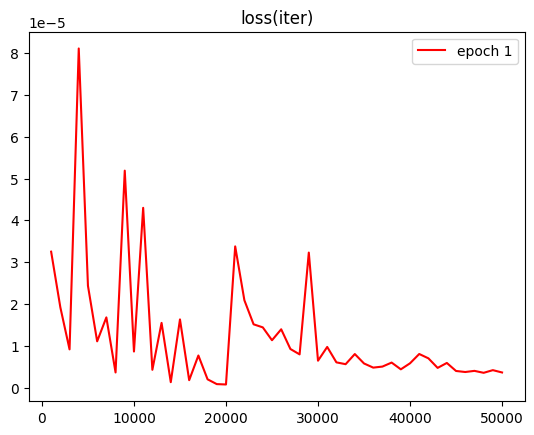

In [13]:
plt.rcParams['figure.dpi'] = 100
for i in range(0,t_sectors):
    plt.plot(np.array(iter_array)[i*50:(i+1)*50], np.array(loss_array)[i*50:(i+1)*50], color=colors[i], label=f'epoch {i+1}')
#plt.ylim(0,5e-6)
plt.title('loss(iter)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Результаты

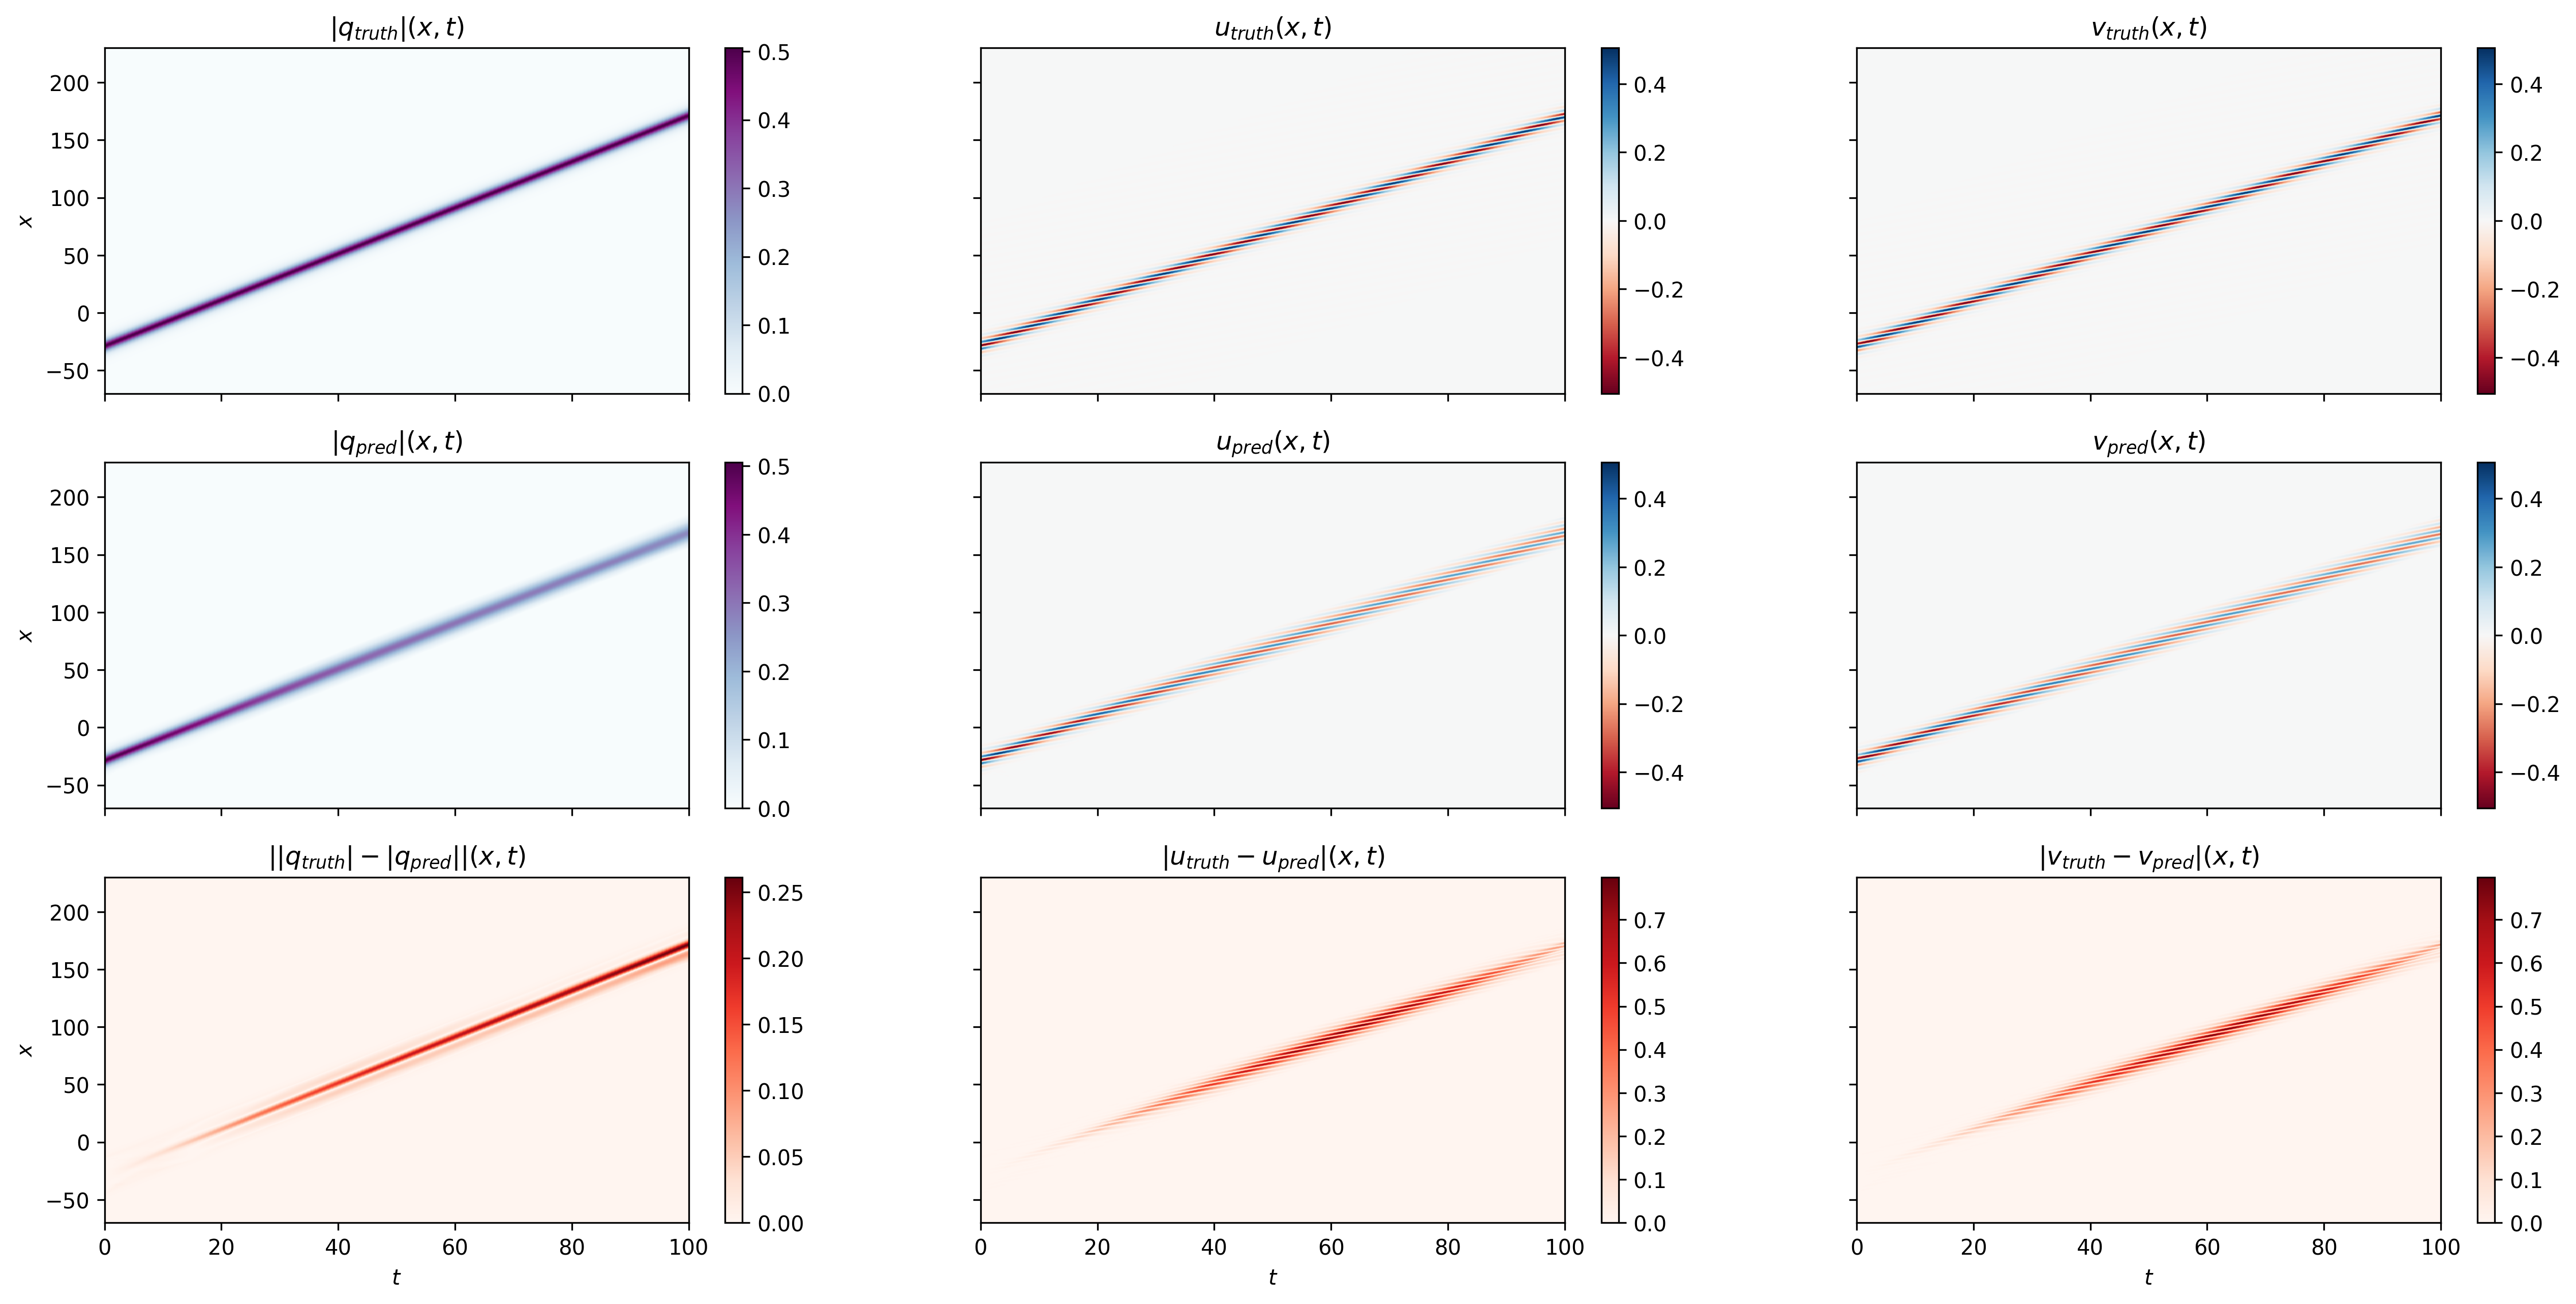

In [14]:
Q_truth=q(final_X,final_T)[0]+1j*q(final_X,final_T)[1]
U_truth=np.real(Q_truth)
V_truth=np.imag(Q_truth)
Q_abs_truth=np.abs(Q_truth)

fig, axs = plt.subplots(3, 3, figsize=(21,10), dpi=300)

for ax in axs.flat:
    ax.set(xlabel='$t$', ylabel='$x$')

for ax in axs.flat:
    ax.label_outer()

q_abs_min, q_abs_max = 0, np.abs(Q_abs_truth).max()
c = axs[0,0].pcolormesh(final_T, final_X, Q_abs_truth, cmap='BuPu', vmin=q_abs_min, vmax=q_abs_max)
axs[0,0].set_title('$|q_{truth}|(x,t)$')
axs[0,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,0])

u_min, u_max = -np.abs(U_truth).max(), np.abs(U_truth).max()
c = axs[0,1].pcolormesh(final_T, final_X, U_truth, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[0,1].set_title('$u_{truth}(x,t)$')
axs[0,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,1])

c = axs[0,2].pcolormesh(final_T, final_X, V_truth, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[0,2].set_title('$v_{truth}(x,t)$')
axs[0,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[0,2])


#q_abs_min, q_abs_max = 0, np.abs(Q_abs_calc).max()
c = axs[1,0].pcolormesh(final_T, final_X, final_Q_abs, cmap='BuPu', vmin=q_abs_min, vmax=q_abs_max)
axs[1,0].set_title('$|q_{pred}|(x,t)$')
axs[1,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,0])

#u_min, u_max = -np.abs(U_calc).max(), np.abs(U_calc).max()
c = axs[1,1].pcolormesh(final_T, final_X, final_U, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[1,1].set_title('$u_{pred}(x,t)$')
axs[1,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,1])

c = axs[1,2].pcolormesh(final_T, final_X, final_V, cmap='RdBu', vmin=u_min, vmax=u_max)
axs[1,2].set_title('$v_{pred}(x,t)$')
axs[1,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[1,2])


U_diff = np.abs(U_truth-final_U)
V_diff = np.abs(V_truth-final_V)
Q_abs_diff = np.abs(Q_abs_truth-final_Q_abs)

q_abs_min, q_abs_max = 0, np.abs(Q_abs_diff).max()
c = axs[2,0].pcolormesh(final_T, final_X, Q_abs_diff, cmap='Reds', vmin=q_abs_min, vmax=q_abs_max)
axs[2,0].set_title('$||q_{truth}|-|q_{pred}||(x,t)$')
axs[2,0].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,0])

u_min, u_max = U_diff.min(), U_diff.max()
c = axs[2,1].pcolormesh(final_T, final_X, U_diff, cmap='Reds', vmin=u_min, vmax=u_max)
axs[2,1].set_title('$|u_{truth}-u_{pred}|(x,t)$')
axs[2,1].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,1])

c = axs[2,2].pcolormesh(final_T, final_X, V_diff, cmap='Reds', vmin=u_min, vmax=u_max)
axs[2,2].set_title('$|v_{truth}-v_{pred}|(x,t)$')
axs[2,2].axis([t_0, t_1, x_0, x_1])
fig.colorbar(c, ax=axs[2,2])

plt.savefig(f"exp_{exp_name}/enhanced.png")
plt.show()

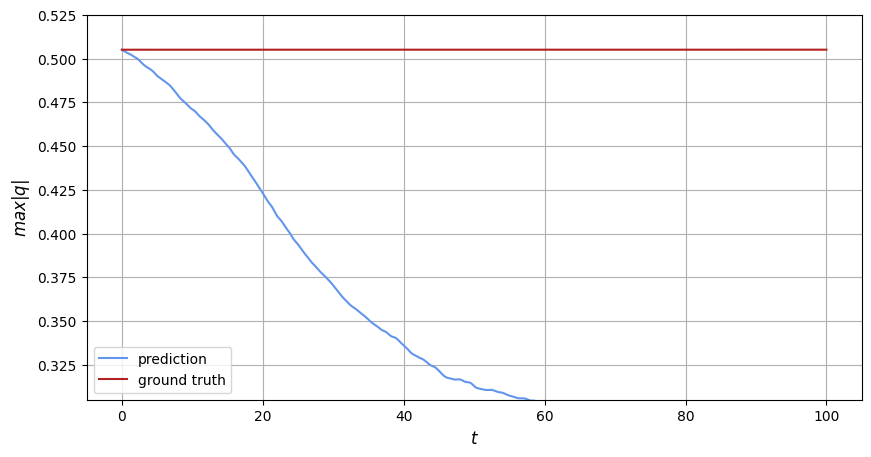

In [20]:
plt.figure(figsize=(10,5))
plt.plot(final_T[::1,0], np.max(final_Q_abs, axis=1)[::1], color = "cornflowerblue", label='prediction')
plt.plot(final_T[:,0], np.max(Q_abs_truth, axis=1), color = "firebrick", label='ground truth')
#plt.title('$max(|q(x)|)$')
plt.xlabel('$t$', fontsize=12)
plt.ylabel('$max |q|$', fontsize=12)
middle = np.max(Q_abs_truth, axis=1)[0]
plt.ylim((middle-0.02, middle+0.02))
plt.grid(True)
plt.legend()
plt.savefig(f"exp_{exp_name}/amplitude.png")
plt.show()

In [16]:
#mse_u = ((u_star-u_pred)**2).mean(axis=0).item()
#mse_v = ((v_star-v_pred)**2).mean(axis=0).item()
mse_q = np.mean((Q_abs_truth.flatten() - final_Q_abs.flatten())**2) #средний квадрат разности модулей
rel_h = np.linalg.norm(Q_abs_truth.flatten() - final_Q_abs.flatten(), 2)/np.linalg.norm(Q_abs_truth.flatten(), 2)
#mse_f_u = ((f_u_pred)**2).mean(axis=0).item() #средняя невязка на действительной части уравнения
#mse_f_v = ((f_v_pred)**2).mean(axis=0).item() #средняя невязка на мнимой части уравнения
print(f'MSE_q: {mse_q:.3e}, Rel_h: {rel_h:.3e}')

MSE_q: 4.718e-04, Rel_h: 3.066e-01


In [17]:
#сохраняем результаты в таблицу
x_star = final_X.flatten()[:,None]
t_star = final_T.flatten()[:,None]
u_star = U_truth.flatten()[:,None]
v_star = V_truth.flatten()[:,None]
q_abs_star = Q_abs_truth.flatten()[:,None]
u_pred = final_U.flatten()[:,None]
v_pred = final_V.flatten()[:,None]
q_abs_pred = final_Q_abs.flatten()[:,None]

data = pd.DataFrame({'x': x_star[:,0],
                     't': t_star[:,0],
                     'true_u': u_star[:,0],
                     'true_v': v_star[:,0],
                     'true_h': q_abs_star[:,0],
                     'pred_u': u_pred[:,0],
                     'pred_v': v_pred[:,0],
                     'pred_h': q_abs_pred[:,0]})
data.to_csv((f"exp_{exp_name}/data.csv"), index=False)

In [18]:
#сохранял в таблицу обработанные, но не улучшенные данные для сравнения. Оказалось, они чуть лучше сырых, но гораздо хуже обработанных
'''processed_U_truth = U_truth[np.where(raw_Q_abs>q_min)]
processed_V_truth = V_truth[np.where(raw_Q_abs>q_min)]
processed_Q_abs_truth = Q_abs_truth[np.where(raw_Q_abs>q_min)]

data = pd.DataFrame({'x': processed_X,
                     't': processed_T,
                     'true_u': processed_U_truth,
                     'true_v': processed_V_truth,
                     'true_h': processed_Q_abs_truth,
                     'pred_u': processed_U,
                     'pred_v': processed_V,
                     'pred_h': processed_Q_abs})
data.to_csv('scot.csv', index=False)'''

"processed_U_truth = U_truth[np.where(raw_Q_abs>q_min)]\nprocessed_V_truth = V_truth[np.where(raw_Q_abs>q_min)]\nprocessed_Q_abs_truth = Q_abs_truth[np.where(raw_Q_abs>q_min)]\n\ndata = pd.DataFrame({'x': processed_X,\n                     't': processed_T,\n                     'true_u': processed_U_truth,\n                     'true_v': processed_V_truth,\n                     'true_h': processed_Q_abs_truth,\n                     'pred_u': processed_U,\n                     'pred_v': processed_V,\n                     'pred_h': processed_Q_abs})\ndata.to_csv('scot.csv', index=False)"